# Dataset details:
Dataset Title = Ratings and reviews for Movies/TV products from Amazon

Number of reviews = 3,410,019

Date range = 1997-12-02 to 2018-10-01

Size of dataset = 791MB

source: https://nijianmo.github.io/amazon/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("Movies_and_TV_5.json.gz", compression='gzip', lines=True)

In [3]:
df_org = df 
# Save raw data backup copy to df_org

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 289.4+ MB


In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [7]:
# For aesthetics purposes
df = df.rename(columns={'overall':'rating','asin':'productID','style':'productType'})

# Data Cleaning

In [8]:
# Check for null entries
df.isnull().sum()
# Will be dropping null for column 'styles' ~5% of data later

rating                  0
verified                0
reviewTime              0
reviewerID              0
productID               0
productType        174207
reviewerName           82
reviewText           1581
summary               640
unixReviewTime          0
vote              2768010
image             3403048
dtype: int64

In [9]:
df['productType'].value_counts() 

{'Format:': ' DVD'}                                1645586
{'Format:': ' Amazon Video'}                       1027966
{'Format:': ' Blu-ray'}                             335181
{'Format:': ' Prime Video'}                         158950
{'Format:': ' VHS Tape'}                             61821
{'Format:': ' HD DVD'}                                1475
{'Format:': ' DVD-R'}                                 1428
{'Format:': ' Theatrical Release'}                     801
{'Format:': ' Audio CD'}                               657
{'Format:': ' DVD-ROM'}                                474
{'Format:': ' UMD for PSP'}                            352
{'Format:': ' Amazon Instant Video'}                   250
{'Format:': ' Electronics'}                            116
{'Format:': ' Hardcover'}                              107
{'Format:': ' Interactive DVD'}                         97
{'Format:': ' Paperback'}                               86
{'Format:': ' Laser Disc'}                              

In [10]:
df['reviewText']

0          So sorry I didn't purchase this years ago when...
1          Believe me when I tell you that you will recei...
2          I have seen X live many times, both in the ear...
3          I was so excited for this!  Finally, a live co...
4          X is one of the best punk bands ever. I don't ...
                                 ...                        
3410014    The singing parts are very good as expected fr...
3410015    This recording of the 2015 production by the M...
3410016    I do not wish to write a review about this rel...
3410017                                       It was a gift.
3410018    This Otello originates from the Salzburg Festi...
Name: reviewText, Length: 3410019, dtype: object

In [11]:
df['reviewText'][0]

"So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one."

In [12]:
# Drop null values from these columns
df = df.dropna(subset=['productType','reviewerName', 'reviewText', 'summary'])

In [13]:
# Drop these columns
df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)

In [14]:
# Check if data is cleaned
df.isnull().sum()

rating          0
verified        0
reviewTime      0
reviewerID      0
productID       0
productType     0
reviewerName    0
reviewText      0
summary         0
dtype: int64

In [15]:
duplicated_reviews = df[df.duplicated(['reviewText'], keep=False)]

In [16]:
duplicated_reviews.info()
# We have about 860k duplicates of text review
# lets remove them, which is about 25% of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868955 entries, 29 to 3410018
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        868955 non-null  int64 
 1   verified      868955 non-null  bool  
 2   reviewTime    868955 non-null  object
 3   reviewerID    868955 non-null  object
 4   productID     868955 non-null  object
 5   productType   868955 non-null  object
 6   reviewerName  868955 non-null  object
 7   reviewText    868955 non-null  object
 8   summary       868955 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 60.5+ MB


In [17]:
df = df.drop_duplicates(subset=['reviewText'])

In [18]:
df.info()
# We still have 2.5 million entries after removing 25% of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560768 entries, 0 to 3410016
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   rating        int64 
 1   verified      bool  
 2   reviewTime    object
 3   reviewerID    object
 4   productID     object
 5   productType   object
 6   reviewerName  object
 7   reviewText    object
 8   summary       object
dtypes: bool(1), int64(1), object(7)
memory usage: 178.3+ MB


# Using a subset of the dataset

In [19]:
df['rating'].value_counts() 
# Ratings 4 & 5 will be considered as pos review 
# Ratings 1 & 2 will be considered as neg review
# Will make the number of pos & neg reviews equal

5    1438318
4     527109
3     286147
1     162891
2     146303
Name: rating, dtype: int64

In [20]:
df_temp = df.loc[(df['rating'] == 2) | (df['rating'] == 1)]

In [21]:
df_temp.info() # We have 309194 negative reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309194 entries, 16 to 3409975
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        309194 non-null  int64 
 1   verified      309194 non-null  bool  
 2   reviewTime    309194 non-null  object
 3   reviewerID    309194 non-null  object
 4   productID     309194 non-null  object
 5   productType   309194 non-null  object
 6   reviewerName  309194 non-null  object
 7   reviewText    309194 non-null  object
 8   summary       309194 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 21.5+ MB


In [22]:
df_temp2 = df.loc[(df['rating'] == 4) | (df['rating'] == 5)]

In [23]:
df_temp2 = df_temp2[0:309194]

In [24]:
df_temp2.info() # We now have 309194 positive reviews

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309194 entries, 0 to 446398
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        309194 non-null  int64 
 1   verified      309194 non-null  bool  
 2   reviewTime    309194 non-null  object
 3   reviewerID    309194 non-null  object
 4   productID     309194 non-null  object
 5   productType   309194 non-null  object
 6   reviewerName  309194 non-null  object
 7   reviewText    309194 non-null  object
 8   summary       309194 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 21.5+ MB


In [25]:
df = pd.concat([df_temp, df_temp2], ignore_index=True)

In [26]:
df['rating'].value_counts()

5    233136
1    162891
2    146303
4     76058
Name: rating, dtype: int64

# Changing reviewTime to datetime object

In [27]:
type(df['reviewTime'][0]) 
# time in str format, lets change it to datetime object next

str

In [28]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

In [29]:
type(df['reviewTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
df['reviewTime'].describe()

C:\Users\eugen\AppData\Local\Temp\ipykernel_31592\3300267488.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['reviewTime'].describe()


count                  618388
unique                   7257
top       2015-02-20 00:00:00
freq                     1179
first     1997-12-02 00:00:00
last      2018-09-27 00:00:00
Name: reviewTime, dtype: object

In [31]:
df = df.reset_index(drop=True)

In [32]:
# Clone to another df called df1, will be setting index to date for this df1
# Now df will be a backup and will be working on df1 here onwards
# Note that we still have df_org as the raw data backup copy
df1 = df

In [33]:
df1 = df1.set_index('reviewTime')

In [34]:
df1 = df1.sort_index()

In [35]:
df1

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary
reviewTime,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan"
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!
1998-02-05,5,False,A28BJ12568I17K,6303118240,{'Format:': ' VHS Tape'},Mire Uno,Animation by Hayao Miyazaki and one of my favo...,Nostalgy for Japan in 50s
1998-02-24,5,False,A28BJ12568I17K,6303481264,{'Format:': ' VHS Tape'},Mire Uno,Wings of Honneamise is the first theater versi...,Origin of Evangelion. GAINAX's first animation...
1998-02-24,5,False,A28BJ12568I17K,6304164084,{'Format:': ' VHS Tape'},Mire Uno,Japanese title is Macross and quite long TV an...,Macross: well loved saga in Japan
...,...,...,...,...,...,...,...,...
2018-09-26,2,True,A1255OD4TD7RO9,B01DLVAHQG,{'Format:': ' DVD'},bardo,Disappointing interpretation of Richard III by...,Disappointing; not worth buying.
2018-09-26,1,True,A19WMFLV99G7ML,B01GU82O9U,{'Format:': ' DVD'},franktorres,this item was stollen,The tool of off my door step
2018-09-27,1,True,A33KOM5ACSIMFL,B01HDHA98A,{'Format:': ' DVD'},tammy williams,Nothing even remotely scary about a werewolf i...,YIKES!!


# Exploratory Data Analysis

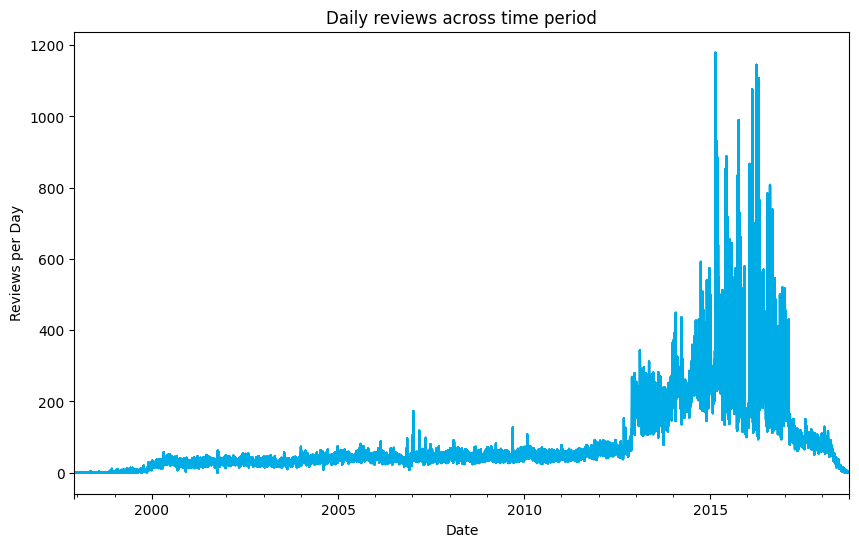

In [36]:
# Line plot to visualize the number of reviews per day across the datetime index
df_count = df1.resample('D').count()
df_count.plot(kind='line', figsize=(10, 6), legend=None, color='#00ace6')
plt.xlabel('Date')
plt.ylabel('Reviews per Day')
plt.title('Daily reviews across time period')
plt.show()

In [37]:
df_count['rating'].max()

1179

In [38]:
most_reviews = df_count['rating'].max()
date_most_reviews = df_count.index[df_count['rating'] == 1179]
# Highest number of reviews made in a day was 6021 reviews
print(f"The highest number of reviews made in a day was {most_reviews} reviews")
print(f"This occurred on {date_most_reviews[0]}")

The highest number of reviews made in a day was 1179 reviews
This occurred on 2015-02-20 00:00:00


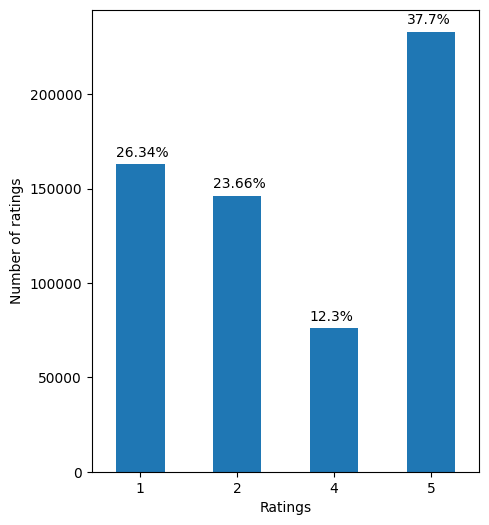

In [39]:
# Barplot to visualize the ratings made by the customers
plt.figure(figsize=(5,6))
rating = df1['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.25, v+4000, str(percent) + '%')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()

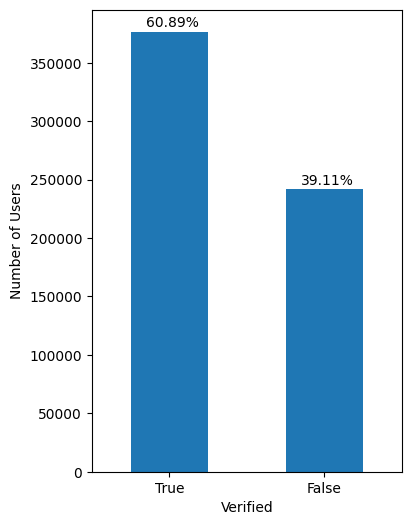

In [40]:
# Barplot to visualize between the verified and not verified users
plt.figure(figsize=(4,6))
rating = df1['verified'].value_counts()
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.15, v+4000, str(percent) + '%')
plt.xlabel('Verified')
plt.xticks(rotation=0)
plt.ylabel('Number of Users')
plt.show()

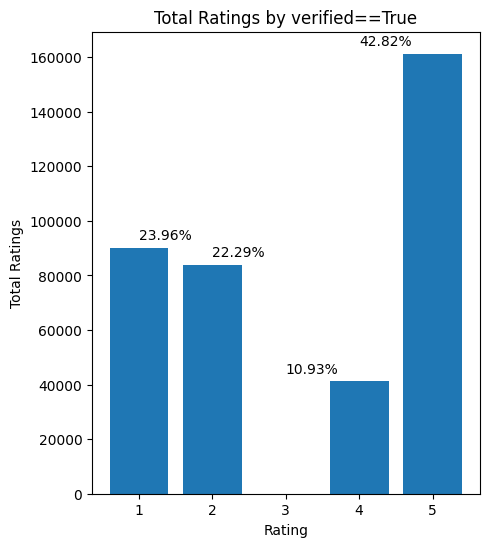

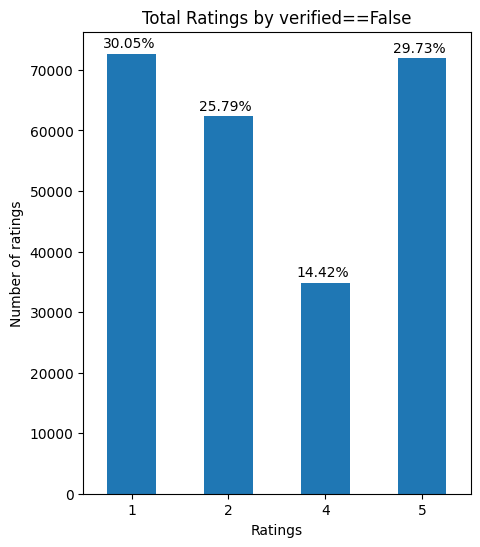

In [41]:
'''
Documentation to elaborate the definition of 'verified review'

A 'verified review' means that the reviewer bought or used the item
on Amazon, and paid a price available to most Amazon shoppers. 
After someone submits a review, Amazon check if they: 
Bought or used the item on Amazon; Paid a price available to most Amazon shoppers.

'''



'''

This visualization checks whether there is any intentional input bias from
non-verified reviewers whereby they could deliberately spam bad ratings (1-2)
to skew to overall rating for the product.

By comparing verified vs non-verified ratings, we can see that the overall
sentiment is less positive for the non-verified ratings


'''


# Perform a visualization on the ratings made by the verified reviews

# Subset the dataframe to only include rows where gender is male
df_true = df1[df1['verified'] == True]

# Group by rating and calculate the sum of total_ratings for each rating
true_ratings = df_true.groupby('rating')['verified'].sum()

# Create a barplot of the male ratings
plt.figure(figsize=(5,6))
plt.bar(true_ratings.index, true_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
plt.title('Total Ratings by verified==True')

# Add percentage values to each bar
total = sum(true_ratings)
for i, v in enumerate(true_ratings):
    percent = round((v/total)*100, 2)
    plt.text(i+1, v+3000, str(percent)+'%')
    
plt.show()




df_false = df1[df1['verified'] == False]
plt.figure(figsize=(5,6))
rating = df_false['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df_false)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.3, v+1000, str(percent) + '%')
plt.title('Total Ratings by verified==False')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()

In [42]:
# # Line plot to visualize the number of reviews by non-verified reviewers per day across the datetime index
# df_false_count = df_false.resample('D').count()
# df_false_count.plot(kind='line', figsize=(10, 6), legend=None, color='#00ace6')
# plt.xlabel('Date')
# plt.ylabel('Reviews per Day')
# plt.title('Daily reviews across time period')
# plt.show()

# Visualizing word count for positive vs negative reviews

In [43]:
df1['reviewText']

reviewTime
1997-12-02    This TV animation series opened up many disput...
1998-01-03    Here's a semi-remake of "Holiday Inn" (1942), ...
1998-02-05    Animation by Hayao Miyazaki and one of my favo...
1998-02-24    Wings of Honneamise is the first theater versi...
1998-02-24    Japanese title is Macross and quite long TV an...
                                    ...                        
2018-09-26    Disappointing interpretation of Richard III by...
2018-09-26                                this item was stollen
2018-09-27    Nothing even remotely scary about a werewolf i...
2018-09-27    I saw the first one and I loved it. I watched ...
2018-09-27    The movie was slapped together, script & actin...
Name: reviewText, Length: 618388, dtype: object

In [44]:
# with open('training_data.txt', 'w') as f:
#     for review in df1['reviewText']:
#         f.write(review + '\n')

In [45]:
df1['word_count'] = df1['reviewText'].apply(lambda x: len(x.split()))

In [46]:
df1.head(3)

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary,word_count
reviewTime,,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan",263
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!,263
1998-02-05,5,False,A28BJ12568I17K,6303118240,{'Format:': ' VHS Tape'},Mire Uno,Animation by Hayao Miyazaki and one of my favo...,Nostalgy for Japan in 50s,111


In [47]:
df1['word_count'].max()

5230

In [48]:
df_pos = df1[(df1['rating'] == 4) | (df1['rating'] == 5)]

In [49]:
df_neg = df1[(df1['rating'] == 1) | (df1['rating'] == 2)]

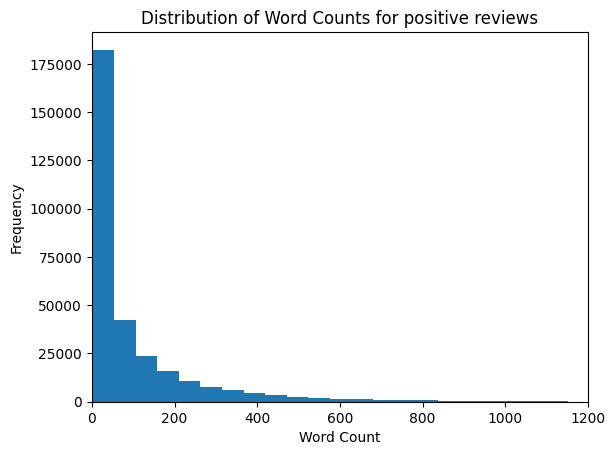

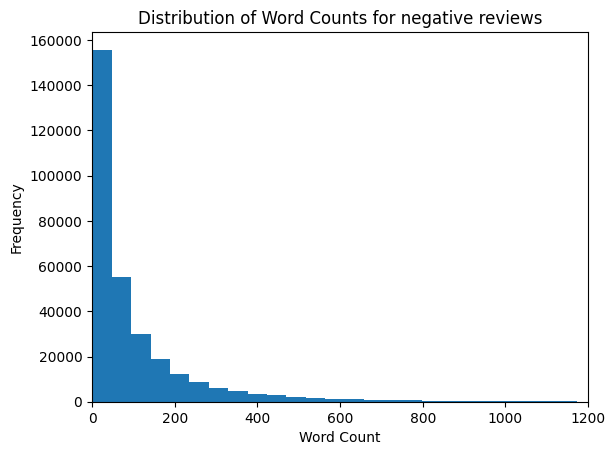

In [50]:
plt.hist(df_pos['word_count'], bins=100)
plt.title('Distribution of Word Counts for positive reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim((0, 1200))
plt.show()

plt.hist(df_neg['word_count'], bins=100)
plt.title('Distribution of Word Counts for negative reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim((0, 1200))
plt.show()

In [51]:
df_pos['word_count'].mean()

103.74636312476956

In [52]:
df_neg['word_count'].mean() # negative reviews have more word count than positive reviews

105.52215437557003

# Moving onto data preprocessing for NLP

In [53]:
df_nlp = df1[['rating','reviewText']]

In [54]:
df_nlp = df_nlp.loc[df_nlp['rating'] != 3]

In [55]:
df_nlp = df_nlp.reset_index(drop=True)

In [56]:
df_nlp['rating'].value_counts()

5    233136
1    162891
2    146303
4     76058
Name: rating, dtype: int64

In [57]:
def get_sentiment(rating):
    if rating <= 2:
        return 'neg'
    else:
        return 'pos'

In [58]:
df_nlp['label'] = df_nlp['rating'].apply(get_sentiment)

In [59]:
df_nlp.head()

,rating,reviewText,label
0,5,This TV animation series opened up many disput...,pos
1,4,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",pos
2,5,Animation by Hayao Miyazaki and one of my favo...,pos
3,5,Wings of Honneamise is the first theater versi...,pos
4,5,Japanese title is Macross and quite long TV an...,pos


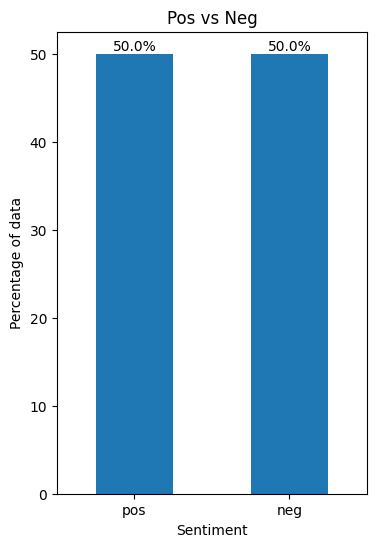

In [60]:
# create the bar plot
plt.figure(figsize=(4,6))
ax = df_nlp['label'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar', rot=0)

# set the x-axis label
ax.set_xlabel('Sentiment')

# set the y-axis label
ax.set_ylabel('Percentage of data')

# set the title of the plot
ax.set_title('Pos vs Neg')

# add a % sign to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# show the plot
plt.show()


# Linear Support Vector Classifier for Sentiment Analysis

In [67]:
from sklearn.model_selection import train_test_split

X = df_nlp['reviewText']
y = df_nlp['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(X_train)

# # Save the fitted vectorizer to a file
# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(vectorizer, f)

TfidfVectorizer()

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import time

text_clf = Pipeline([('tfidf', TfidfVectorizer()), # remove stopwords will result in worse performance
                     ('clf', LinearSVC()),])


start_time = time.time()
# Train the model by feeding the text data through the pipeline
SVC_Model = text_clf.fit(X_train, y_train)  
end_time = time.time()
time_taken = round(end_time-start_time,2)
print(f'Computational time taken = {time_taken} seconds') 

Computational time taken = 25.05 seconds


In [70]:
# Form a prediction set
predictions = SVC_Model.predict(X_test)

In [71]:
# Report the confusion matrix
from sklearn import metrics
SVC_Model_metrics = metrics.confusion_matrix(y_test,predictions)
print(SVC_Model_metrics)

[[85362  7362]
 [ 7347 85446]]


Text(50.722222222222214, 0.5, 'Actual Label')

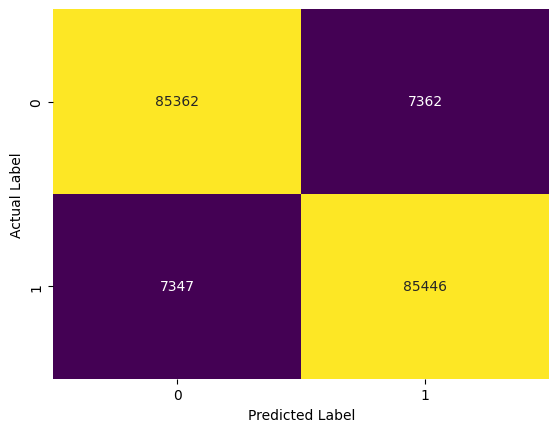

In [72]:
heatmap = sns.heatmap(SVC_Model_metrics, annot=True, fmt='g', cmap='viridis', cbar=False)
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('Actual Label')

In [73]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.92      0.92      0.92     92724
         pos       0.92      0.92      0.92     92793

    accuracy                           0.92    185517
   macro avg       0.92      0.92      0.92    185517
weighted avg       0.92      0.92      0.92    185517



# Hyperparameter Tuning using GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {'clf__C': [0.1, 1, 10]}

# create the grid search object
SVC_Grid = GridSearchCV(text_clf, parameters, cv=10)

start_time = time.time()
# fit the grid search object on the training data
SVC_Grid.fit(X_train, y_train)

end_time = time.time()
time_taken = round(end_time-start_time,2)
print(f'Computational time taken = {time_taken} seconds')

# evaluate the performance of the best estimator on the test data
best_SVC_Model = SVC_Grid.best_estimator_
score = best_SVC_Model.score(X_test, y_test)
print(f"Accuracy: {score}")

# print the best hyperparameters
print(f"Best hyperparameters: {SVC_Grid.best_params_}")


Computational time taken = 998.08 seconds
Accuracy: 0.920395435458745
Best hyperparameters: {'clf__C': 0.1}


In [75]:
# This has better performance at f1-score 0.92 for both neg and pos
predictions_temp = best_SVC_Model.predict(X_test)

In [76]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_temp))

              precision    recall  f1-score   support

         neg       0.92      0.92      0.92     92724
         pos       0.92      0.92      0.92     92793

    accuracy                           0.92    185517
   macro avg       0.92      0.92      0.92    185517
weighted avg       0.92      0.92      0.92    185517

